##CHORNIC KIDNEY DISEASE

**IMPORT PACKAGE**

In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle 

**LOAD THE DATASET**

In [2]:
df=pd.read_csv("/content/kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Understanding_data_types_and_summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.drop(["id"],axis=1,inplace=True)

In [7]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
df.columns=['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
             'blood glucose random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume',
              'white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease',
              'appetite','pedal_edema','anemia','class']

In [9]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [10]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Handling_the_missing_values

In [11]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [12]:
df['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [13]:
df['class']=df['class'].replace("ckd\t","ckd")
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [15]:
catcols=set(df.dtypes[df.dtypes=='O'].index.values)
print(catcols)

{'red_blood_cell_count', 'appetite', 'pus_cell', 'pus_cell_clumps', 'diabetesmellitus', 'hypertension', 'bacteria', 'packed_cell_volume', 'pedal_edema', 'red_blood_cells', 'class', 'anemia', 'white_blood_cell_count', 'coronary_artery_disease'}


In [16]:
for i in catcols:
    print("columns :",i)
    print(c(df[i]))
    print('*'*120+'\n')

columns : red_blood_cell_count
Counter({nan: 130, '5.2': 18, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '5': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4': 6, '4.3': 6, '4.2': 6, '5.6': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6': 4, '6.3': 4, '3.5': 3, '3.3': 3, '3': 3, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '2.3': 1, '8': 1, '2.4': 1, '\t?': 1})
************************************************************************************************************************

columns : appetite
Counter({'good': 317, 'poor': 82, nan: 1})
************************************************************************************************************************

columns : pus_cell
Counter({'normal': 259, 'abnormal': 76, nan: 65})
*********************************************************************************************************************

In [17]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'appetite', 'pus_cell', 'pus_cell_clumps', 'diabetesmellitus', 'hypertension', 'bacteria', 'pedal_edema', 'red_blood_cells', 'class', 'anemia', 'coronary_artery_disease'}


In [18]:
contcols=set(df.dtypes[df.dtypes!='O'].index.values)
print(contcols)

{'albumin', 'age', 'specific_gravity', 'serum_creatinine', 'blood_pressure', 'potassium', 'sugar', 'blood glucose random', 'blood_urea', 'sodium', 'hemoglobin'}


In [19]:
for i in contcols:
    print("continous columns :",i)
    print(c(df[i]))
    print('*'*120+'\n')

continous columns : albumin
Counter({0.0: 199, 1.0: 44, 2.0: 43, 3.0: 43, 4.0: 24, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 5.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
************************************************************************************************************************

continous columns : age
Counter({60.0: 19, 65.0: 17, 48.0: 12, 50.0: 12, 55.0: 12, 47.0: 11, 62.0: 10, 45.0: 10, 54.0: 10, 59.0: 10, 56.0: 10, 61.0: 9, 70.0: 9, 46.0: 9, 34.0: 9, 68.0: 8, 73.0: 8, 64.0: 8, 71.0: 8, 57.0: 8, 63.0: 7, 72.0: 7, 67.0: 7, 30.0: 7, 42.0: 6, 69.0: 6, 35.0: 6, 44.0: 6, 43.0: 6, 33.0: 6, 51.0: 5, 52.0: 5, 53.0: 5, 75.0: 5, 76.0: 5, 58.0: 5, 41.0: 5, 66.0: 5, 24.0: 4, 40.0: 4, 39.0: 4, 80.0:

In [20]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'age', 'serum_creatinine', 'blood_pressure', 'potassium', 'blood glucose random', 'blood_urea', 'sodium', 'hemoglobin'}


In [21]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'red_blood_cell_count', 'age', 'packed_cell_volume', 'serum_creatinine', 'blood_pressure', 'potassium', 'blood glucose random', 'blood_urea', 'white_blood_cell_count', 'sodium', 'hemoglobin'}


In [22]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'appetite', 'pus_cell', 'pus_cell_clumps', 'diabetesmellitus', 'albumin', 'hypertension', 'bacteria', 'specific_gravity', 'pedal_edema', 'red_blood_cells', 'class', 'sugar', 'anemia', 'coronary_artery_disease'}


In [23]:
df.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

# get unique values from categorical data's


In [26]:
for col in catcols:
    print(f"{col} has {df[col].unique()} values \n")

appetite has ['good' 'poor' nan] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

diabetesmellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

albumin has [ 1.  4.  2.  3.  0. nan  5.] values 

hypertension has ['yes' 'no' nan] values 

bacteria has ['notpresent' 'present' nan] values 

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values 

pedal_edema has ['no' 'yes' nan] values 

red_blood_cells has [nan 'normal' 'abnormal'] values 

class has ['ckd' 'notckd'] values 

sugar has [ 0.  3.  4.  1. nan  2.  5.] values 

anemia has ['no' 'yes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

diabetesmellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

albumin has [ 1.  4.  2.  3.  0. nan  5.] values 

hypertension has ['yes

In [27]:
df['coronary_artery_disease']=df.coronary_artery_disease.replace('\tno','no')
c(df['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [28]:
df['diabetesmellitus']=df.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(df['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

In [30]:
df.packed_cell_volume = pd.to_numeric(df.packed_cell_volume, errors='coerce')
df.white_blood_cell_count = pd.to_numeric(df.white_blood_cell_count, errors='coerce')
df.red_blood_cell_count = pd.to_numeric(df.red_blood_cell_count, errors='coerce')

In [32]:
df['blood glucose random'].fillna(df['blood glucose random'].mean(),inplace=True)
df['blood_pressure'].fillna(df['blood_pressure'].mean(),inplace=True)
df['blood_urea'].fillna(df['blood_urea'].mean(),inplace=True)
df['hemoglobin'].fillna(df['hemoglobin'].mean(),inplace=True)
df['packed_cell_volume'].fillna(df['packed_cell_volume'].mean(),inplace=True)
df['potassium'].fillna(df['potassium'].mean(),inplace=True)
df['red_blood_cell_count'].fillna(df['red_blood_cell_count'].mean(),inplace=True)
df['serum_creatinine'].fillna(df['serum_creatinine'].mean(),inplace=True)
df['sodium'].fillna(df['sodium'].mean(),inplace=True)
df['white_blood_cell_count'].fillna(df['white_blood_cell_count'].mean(),inplace=True)

In [33]:
df['age'].fillna(df['age'].mode()[0],inplace=True)
df['hypertension'].fillna(df['hypertension'].mode()[0],inplace=True)
df['pus_cell_clumps'].fillna(df['pus_cell_clumps'].mode()[0],inplace=True)
df['appetite'].fillna(df['appetite'].mode()[0],inplace=True)
df['albumin'].fillna(df['albumin'].mode()[0],inplace=True)
df['pus_cell'].fillna(df['pus_cell'].mode()[0],inplace=True)
df['red_blood_cells'].fillna(df['red_blood_cells'].mode()[0],inplace=True)
df['coronary_artery_disease'].fillna(df['coronary_artery_disease'].mode()[0],inplace=True)
df['bacteria'].fillna(df['bacteria'].mode()[0],inplace=True)
df['anemia'].fillna(df['anemia'].mode()[0],inplace=True)
df['sugar'].fillna(df['sugar'].mode()[0],inplace=True)
df['diabetesmellitus'].fillna(df['diabetesmellitus'].mode()[0],inplace=True)
df['pedal_edema'].fillna(df['pedal_edema'].mode()[0],inplace=True)
df['specific_gravity'].fillna(df['specific_gravity'].mode()[0],inplace=True)

In [34]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood glucose random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

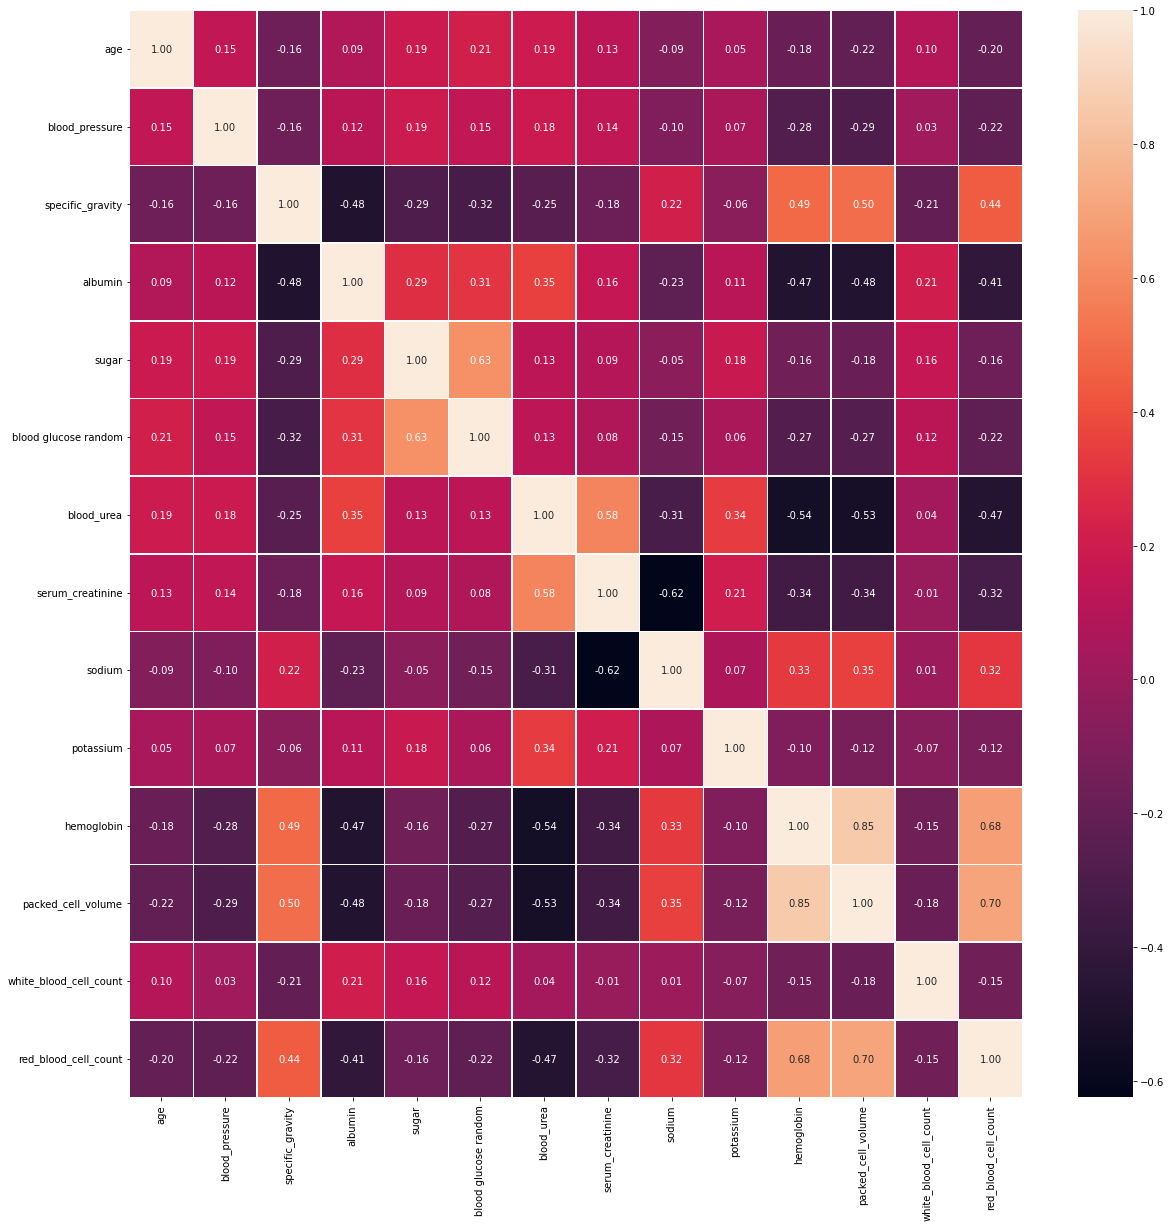

In [35]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [36]:
df.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
age,1.000000,0.146830,-0.161959,0.087907,0.185221,0.213779,0.190669,0.128292,-0.086552,0.049315,-0.182737,-0.217882,0.099872,-0.202618
blood_pressure,0.146830,1.000000,-0.164422,0.122541,0.190218,0.149100,0.183970,0.144359,-0.103220,0.066648,-0.279535,-0.292714,0.026067,-0.220822
specific_gravity,-0.161959,-0.164422,1.000000,-0.479962,-0.292053,-0.317893,-0.249370,-0.176146,0.217473,-0.063324,0.492143,0.501064,-0.206884,0.443741
albumin,0.087907,0.122541,-0.479962,1.000000,0.287751,0.310481,0.346935,0.160252,-0.228076,0.111614,-0.474211,-0.475165,0.207303,-0.411122
sugar,0.185221,0.190218,-0.292053,0.287751,1.000000,0.629809,0.126043,0.094565,-0.053452,0.180067,-0.156876,-0.181518,0.159034,-0.163871
blood glucose random,0.213779,0.149100,-0.317893,0.310481,0.629809,1.000000,0.127489,0.082242,-0.154393,0.056695,-0.269149,-0.267580,0.121371,-0.222568
blood_urea,0.190669,0.183970,-0.249370,0.346935,0.126043,0.127489,1.000000,0.581222,-0.307360,0.336979,-0.540641,-0.525982,0.041510,-0.465930
serum_creatinine,0.128292,0.144359,-0.176146,0.160252,0.094565,0.082242,0.581222,1.000000,-0.624491,0.205347,-0.342079,-0.341853,-0.005420,-0.323146
sodium,-0.086552,-0.103220,0.217473,-0.228076,-0.053452,-0.154393,-0.307360,-0.624491,1.000000,0.067449,0.333614,0.346817,0.006334,0.316956
potassium,0.049315,0.066648,-0.063324,0.111614,0.180067,0.056695,0.336979,0.205347,0.067449,1.000000,-0.100606,-0.123264,-0.074048,-0.120456


In [37]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
    ("LABEL ENCODING OF:",i)
    LEi=LabelEncoder()
    print(c(df[i]))
    df[i]=LEi.fit_transform(df[i])
    print(c(df[i]))
    print("*"*100)

Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
Counter({'normal': 324, 'abnormal': 76})
Counter({1: 324, 0: 76})
****************************************************************************************************
Counter({'notpresent': 358, 'present': 42})
Counter({0: 358, 1: 42})
****************************************************************************************************
Counter({'no': 263, 'yes': 137})
Counter({0: 263, 1: 137})
****************************************************************************************************
Counter({0.0: 245, 1.0: 44, 2.0: 43, 3.0: 43, 4.0: 24, 5.0: 1})
Counter({0: 245, 1: 44, 2: 43, 3: 43, 4: 24, 5: 1})
****************************************************************************************************
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
******************************************************************

# DATA SPLITING 

# TRAIN AND TEST SET

In [38]:
selcols=['age','blood_urea','blood glucose random','coronary_artery_disease','anemia','pus_cell','red_blood_cells',
         'diabetesmellitus','pedal_edema']

x=pd.DataFrame(df,columns=selcols)
y=pd.DataFrame(df,columns=['class'])
print(x.shape)
print(y.shape)

(400, 9)
(400, 1)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 9)
(320, 1)
(80, 9)
(80, 1)


In [40]:
x_train

,age,blood_urea,blood glucose random,coronary_artery_disease,anemia,pus_cell,red_blood_cells,diabetesmellitus,pedal_edema
205,61.0,28.0,100.000000,0,0,1,1,1,0
354,32.0,17.0,102.000000,0,0,1,1,0,0
3,48.0,56.0,117.000000,0,1,0,1,0,1
264,42.0,24.0,132.000000,0,0,1,1,0,0
194,80.0,49.0,148.036517,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
299,73.0,48.0,127.000000,0,0,1,1,0,0
22,48.0,163.0,95.000000,0,1,0,1,0,0
72,64.0,35.0,148.036517,0,0,0,1,1,1
15,40.0,162.0,76.000000,0,1,1,1,0,0


In [41]:
y_train

,class
205,0
354,1
3,0
264,1
194,0
...,...
299,1
22,0
72,0
15,0
